In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import numpy as np
from matplotlib import pyplot as plt
import igraph

import pythd

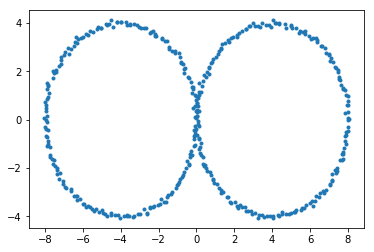

In [2]:
# Create and show two circles with some noise
dataset = (pythd.datagen.DatasetGenerator()
                .circle(center=[-4.0, 0.0], radius=4.0, noise=0.06, num_points=200)
                .circle(center=[4.0, 0.0], radius=4.0, noise=0.06, num_points=200)).get()
plt.plot(dataset[:, 0], dataset[:, 1], ".")
plt.show()

In [3]:
# Setup MAPPER
filt = pythd.filter.ComponentFilter(0) # filter: x component
f_x = filt(dataset)
cover = pythd.cover.IntervalCover1D.EvenlySpacedFromValues(f_x, 10, 0.5)
clustering = pythd.clustering.HierarchicalClustering()

In [4]:
# Run MAPPER
mapper = pythd.mapper.MAPPER(filter=filt, cover=cover, clustering=clustering)
res = mapper.run(dataset)

In [5]:
# Create igraph graph
res.compute_k_skeleton(k=1)
g = res.get_igraph_network()
print(g)

IGRAPH UN-- 17 18 --
+ attr: data (v), name (v), points (v)
+ edges (vertex names):
0--1, 0--2, 0--3, 1--14, 1--15, 1--16, 2--4, 3--5, 4--6, 5--7, 6--8, 7--8,
9--10, 9--11, 10--12, 11--13, 12--16, 13--14


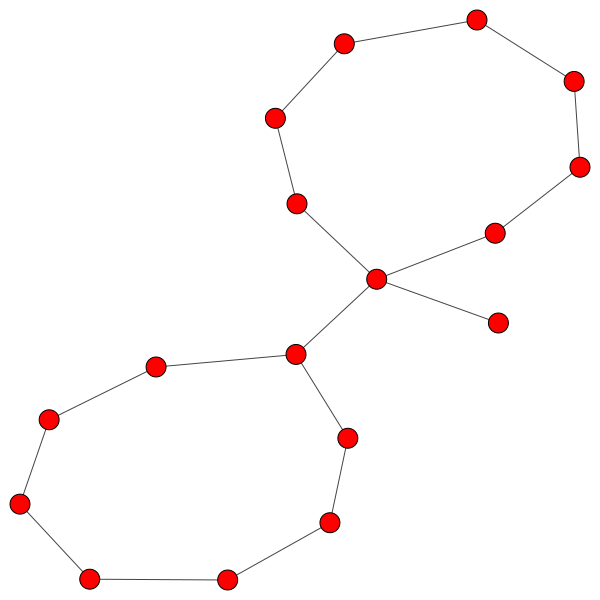

In [6]:
# Visualize the graph
layout = g.layout_kamada_kawai()
igraph.plot(g, layout=layout)

C:\Users\Kbrown\Anaconda2\envs\pytorch\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


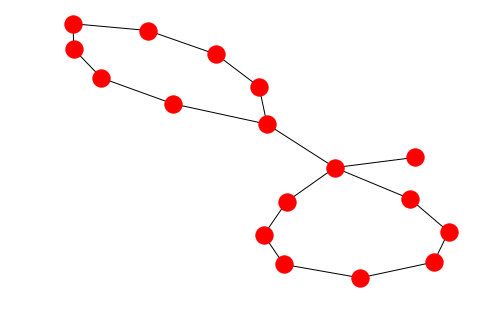

In [7]:
# Visualize with networkx
import networkx as nx
g = res.get_networkx_network()
nx.draw(g)

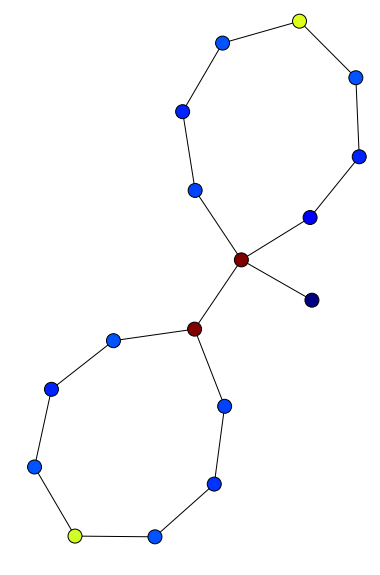

In [8]:
from importlib import reload
import pythd.plotting as plot
reload(plot)
plot.draw_2_skeleton(res.compute_k_skeleton(k=2), layout)